# **COMMENCMENT OF THE PROJECT**

### **IMPORTING DATA FROM CLEVELAND DATASET (FROM DRIVE)**

**Number of instance**: 302

**Number of attributes**: 14 continuous attributes

**Each of a ttributes**:
  
 **age**: Age in years
  
  **sex**: Sex(1 = male, 0 = female)
  
 **cp**: Chest pain type (Value 1: typical angina, Value 2: atypical angina,
  Value 3: non-aginal pain, Value 4: asymptomatic
  
  **trestbps**: Resting blood pressure (in mmHg on admission to hospital)
  
  **chol**: Serum Cholestrol in mg/dl
  
  **fbs**: fast blood sugar > 120 mg/dl (1 = true, 0 = false)
  
  **restecg**: Resting electrocardiographic results (0: normal, 1: having ST-T wave
  abnormality (T-wave inversions and/or St elevation or depression of > 0.
  05mV), 2: showing probable or definite left ventricular hypertrophy by Estes'
  criteria)
  
  **thalach**: Maximum heart rate achieved
  
  **exang**: Exercise included angina (1=yes, 0=no)
  
  **oldpeak**: ST depression indiced by exercise relative to rest
  
  **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2:
  flat, Value 3: downsloping)
  
  **ca** : Number of major vessels (0-3) colored by flourosopy
  
  **thal**: 3 =  normal, 6 = fixed defect, 7 = reversable defect
  
  **HeartDisease**: Diagnosis of heart disease- angiprahic disease status(Value 0:
  < 50% diameter narrowing, Value 1: > 50% diameter narrowing) in any major
  vessel: attributes 59 through 68 are vessels

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#excel file consisting of data is present here

%cd /content/drive/My Drive/Colab Notebooks/AI_Course_Healthcare

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/AI_Course_Healthcare


In [3]:
#import all the data into this python file
HDName = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalac', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease']
data = pd.read_excel('Ch3.ClevelandData.xlsx', names=HDName)

In [4]:
print(data.head(15))
print(data.info())
summary = data.describe()
print(summary)

    age  sex  cp  trestbps  chol  fbs  restecg  thalac  exang  oldpeak  slope  \
0    67    1   4       160   286    0        2     108      1      1.5      2   
1    67    1   4       120   229    0        2     129      1      2.6      2   
2    37    1   3       130   250    0        0     187      0      3.5      3   
3    41    0   2       130   204    0        2     172      0      1.4      1   
4    56    1   2       120   236    0        0     178      0      0.8      1   
5    62    0   4       140   268    0        2     160      0      3.6      3   
6    57    0   4       120   354    0        0     163      1      0.6      1   
7    63    1   4       130   254    0        2     147      0      1.4      2   
8    53    1   4       140   203    1        2     155      1      3.1      3   
9    57    1   4       140   192    0        0     148      0      0.4      2   
10   56    0   2       140   294    0        2     153      0      1.3      2   
11   56    1   3       130  

### **DATA ANALYSIS**

In [5]:
#Anamoly: The columns thal(thalassamia) and ca(no of major vessels) have numeric values but they are interpreted as object dtype however they contain numeric values
#Reason for anomaly: Missing values will not allow python to depict the correct classificaton

Pandas dype: object -> Python dtype is string -> usage as text

Pandas dype: int64 -> Python dtype is int -> usage as integer numbers

Pandas dype: float64 -> Python dtype is float -> usage as floating point numbers


**Now we handle the missing values by detecting them first**

In [6]:
import numpy as np

dataNew = data.replace('?',np.nan)

In [7]:
print(dataNew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalac        302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            298 non-null    float64
 12  thal          300 non-null    float64
 13  HeartDisease  302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB
None


As we see above the missing values are now replaced and the two columns that were presumed to be of dtype:object are now numbers as well dtype:float64

In [8]:
print(dataNew.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.410596    0.678808    3.165563  131.645695  246.738411    0.145695   
std      9.040163    0.467709    0.953612   17.612202   51.856829    0.353386   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.500000    1.000000    3.000000  130.000000  241.500000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg      thalac       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  298.000000   
mean     0.986755  149.605960    0.327815    1.035430    1.596026    0.674497   
std      0.994916   22.9129

In [9]:
print(dataNew.isnull().sum())

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalac          0
exang           0
oldpeak         0
slope           0
ca              4
thal            2
HeartDisease    0
dtype: int64


**We can observe above 'ca' and 'thal' have 2 and 4 nan values (Not a Number), Therefore we need to do the following:**

1.   Replace the NaN values with constant values
2.   Set the values with other column's values (approximate or impute missing values according to the other values present in the data)
3. Transform the data with functions
4. Delete rows having NaN values

In [10]:
dataNew = dataNew.dropna()
print(dataNew.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   trestbps      296 non-null    int64  
 4   chol          296 non-null    int64  
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalac        296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.7 KB
None


In [11]:
print(dataNew.isnull().sum()) # we will see the NaN values are removed from the data

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalac          0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
HeartDisease    0
dtype: int64


The coefficient of variation (CV), defined as Standard deviation (SD) divided by the Mean describes the variability of a sample relative to its mean. Because the CV is unitless and usually expressed as a percentage, it is used instead of the SD to compare the spread of data sets that have different units of measurements or have the same units of measurements but differs greatly in magnitude.


Let’s say you’re comparing the weights of mice and rabbits. You determine from a sample that the average weight of mice is 1 ounce with a SD of 0.08 ounces, whereas the mean weight of rabbits is 16 ounces with a SD of 0.4 ounces.

Although the SD of the rabbits is five times greater than the SD of the mice, their CVs support a different conclusion:

• Rabbits: CV = 100 * 0.4 ounces / 16 ounces = 2.5 %

• Mice: CV = 100 * 0.08 ounces / 1 ounce = 8 %

• The CV of mice is more than three times greater than that of the rabbits. In other words, although rabbits have a greater SD, mice have much more weight variability relative to their mean.

For variables measured in different units (let’s say you want to compare weight measured in ounces and length measured in inches) it provides a simple way to compare oranges to apples.

(From Quora)

**The lower the ratio of the standard deviation to mean return, the better risk-return tradeoff.**

x(scale) = (x-mean)/sd

Mean = 0
sd = 1



*   Value > Mean, will have +z score
*   Value < Mean, will have -z score

The value of the z-score tells you how many standard deviations you are away from the mean. If a z-score is equal to 0, it is on the mean. A positive z-score indicates the raw score is higher than the mean average. For example, if a z-score is equal to +1, it is 1 standard deviation above the mean.

We divide the data into Input and Target

We do this because we want all values to be on a general scale and not vary largely. If the values in different columns differ by large size for example one column has values 0 to 1 while the other column has 100 to 10,000 this could cause several problems before we feed the data into a model.

For more information: https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/normalize-data?view=azureml-api-2

In [12]:
InputNames = HDName
print(InputNames)
InputNames.pop()

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalac', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease']


'HeartDisease'

In [13]:
Input = pd.DataFrame(dataNew.iloc[:, 0:13], columns=InputNames)

In [14]:
Target = pd.DataFrame(dataNew.iloc[:, 13], columns=['HeartDisease'])

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Input = np.array(Input).reshape(-1,1)
StandardScaler(copy=True, with_mean=True, with_std=True)

print(scaler.fit(Input))

StandardScaler()


In [16]:
InputScaled = scaler.fit_transform(Input)
InputScaled = pd.DataFrame(InputScaled, columns = InputNames)
summary = InputScaled.describe()
summary = summary.transpose()

print(summary)

          count          mean       std       min       25%       50%  \
age       296.0 -2.550512e-16  1.001693 -2.823438 -0.720814  0.164501   
sex       296.0  6.001206e-18  1.001693 -1.443376 -1.443376  0.692820   
cp        296.0  1.860374e-16  1.001693 -2.263690 -0.173043 -0.173043   
trestbps  296.0  1.920386e-16  1.001693 -2.121540 -0.656413 -0.092903   
chol      296.0  6.601326e-17  1.001693 -2.334999 -0.700097 -0.084604   
fbs       296.0  2.700542e-17  1.001693 -0.406638 -0.406638 -0.406638   
restecg   296.0 -4.800964e-17  1.001693 -1.000046 -1.000046  0.006803   
thalac    296.0  2.160434e-16  1.001693 -3.426010 -0.723490  0.148291   
exang     296.0  1.342770e-16  1.001693 -0.698167 -0.698167 -0.698167   
oldpeak   296.0  6.001206e-17  1.001693 -0.903324 -0.903324 -0.215962   
slope     296.0 -6.901386e-17  1.001693 -0.975788 -0.975788  0.656038   
ca        296.0  1.200241e-17  1.001693 -0.723832 -0.723832 -0.723832   
thal      296.0 -1.800362e-16  1.001693 -0.891149 -

## **DATA VISUALIZATION**

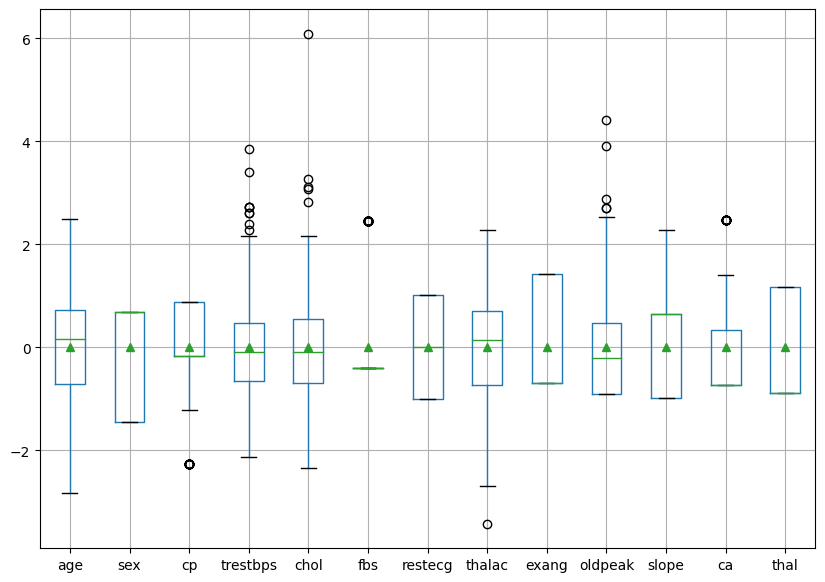

In [17]:
import matplotlib.pyplot as plt
boxplot = InputScaled.boxplot(figsize=(10,7), column=InputNames, showmeans=True)

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trestbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalac', ylabel='age'>,
        <Axes: xlabel='exang', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slope', ylabel='age'>,
        <Axes: xlabel='ca', ylabel='age'>,
        <Axes: xlabel='thal', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trestbps', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalac', ylabel='sex'>,
        <Axes: xlabel='exang', ylabel='sex'

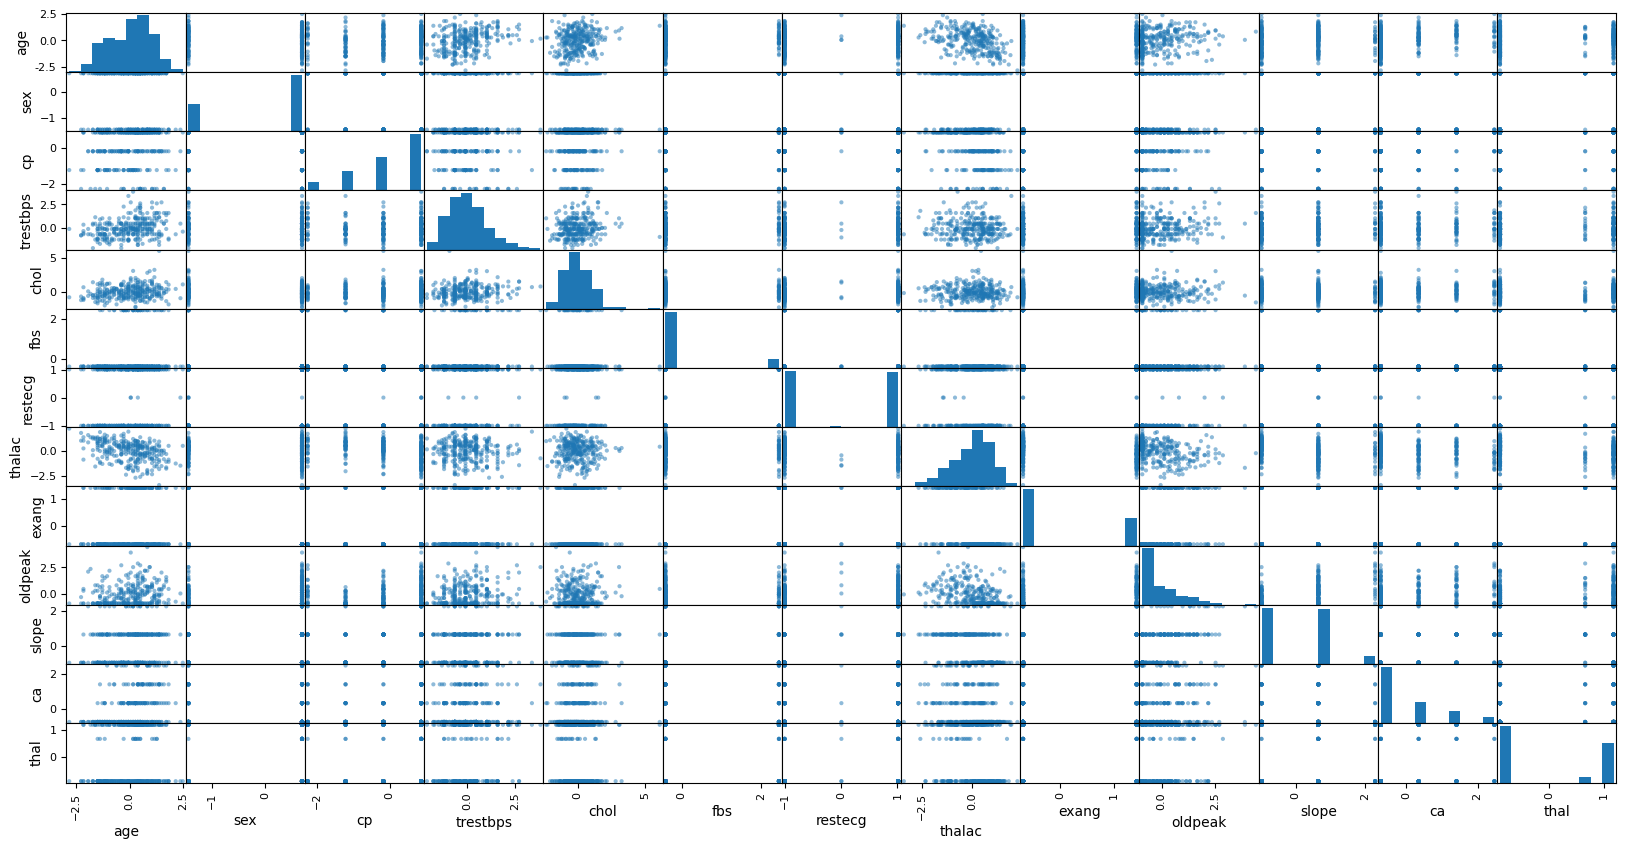

In [18]:
pd.plotting.scatter_matrix(InputScaled, figsize = (20,10))

In [19]:
CorData = InputScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
  print(CorData)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094802  0.118743  0.288805  0.203846  0.125821   
sex      -0.094802  1.000000  0.014272 -0.068212 -0.197629  0.033539   
cp        0.118743  0.014272  1.000000 -0.031599  0.070606 -0.040004   
trestbps  0.288805 -0.068212 -0.031599  1.000000  0.132380  0.176636   
chol      0.203846 -0.197629  0.070606  0.132380  1.000000  0.015132   
fbs       0.125821  0.033539 -0.040004  0.176636  0.015132  1.000000   
restecg   0.147193  0.031618  0.072291  0.147075  0.166298  0.061255   
thalac   -0.395204 -0.060586 -0.342089 -0.049199 -0.000058 -0.008067   
exang     0.098919  0.145444  0.375759  0.068578  0.058744  0.004878   
oldpeak   0.194405  0.104357  0.213564  0.189078  0.039676 -0.000472   
slope     0.153807  0.028328  0.171151  0.116556 -0.007164  0.029783   
ca        0.365356  0.093769  0.232361  0.099967  0.115387  0.159755   
thal      0.124787  0.382707  0.276014  0.136750  0.011481  0.05

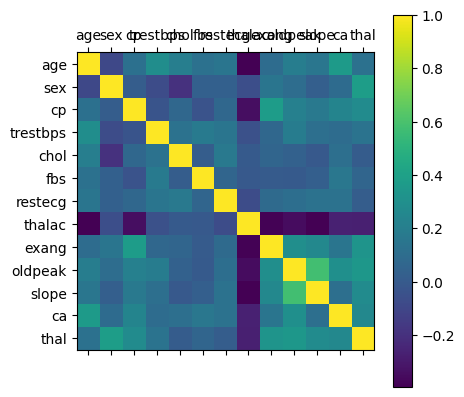

In [20]:
plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()


## **TRAIN AND TESTING WITH EVALUTAION OF MODEL**

In [21]:
from sklearn.model_selection import train_test_split
Input_train, Input_test, Target_train, Target_test = train_test_split(InputScaled, Target, test_size = 0.3, random_state = 42)
print(Input_train.shape)
print(Input_test.shape)
print(Target_train.shape)
print(Target_test.shape)


(207, 13)
(89, 13)
(207, 1)
(89, 1)


test_size = 0.3 defines that 30% data of dataNew is divided for testing purposes 70% for training  (207 for training and 89 for testing)

random_state is the parameter which is basically a randomisation seed used by the random generator

InputScaled and Target parameters are input and target DataFrames

Now, we Create a keras sequential model:

1.   Import the sequential class from keras models
2.   Stack the layers using the .add() method
3.   Configure the learning process and use the .compile() method
4.   Train the model on the train dataset using .fit() method



To understand more about Dense function in Keras refer: https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/

In [22]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))#input
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

To understand the modile.compile function:

*   The adam optimizer: it is an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower order moments.
*   binary_crossentropy: it will be used for logarithmic loss, which for a binary classification problem is defined in keras as binary_crossentropy.

*   The accuracy metrics: This metric function is used to determine the performance of the model during training and testing.

more references:

1.   https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/
2.   https://www.geeksforgeeks.org/gradient-descent-algorithm-and-its-variants/
3.   https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/







In [26]:
model.fit(Input_train, Target_train, epochs=2000, verbose=1)

Epoch 1/2000
7/7 [==============================] - 0s 4ms/step - loss: 8.2982e-05 - accuracy: 1.0000
Epoch 2/2000
7/7 [==============================] - 0s 4ms/step - loss: 8.2462e-05 - accuracy: 1.0000
Epoch 3/2000
7/7 [==============================] - 0s 4ms/step - loss: 8.2165e-05 - accuracy: 1.0000
Epoch 4/2000
7/7 [==============================] - 0s 4ms/step - loss: 8.1757e-05 - accuracy: 1.0000
Epoch 5/2000
7/7 [==============================] - 0s 4ms/step - loss: 8.1287e-05 - accuracy: 1.0000
Epoch 6/2000
7/7 [==============================] - 0s 3ms/step - loss: 8.0883e-05 - accuracy: 1.0000
Epoch 7/2000
7/7 [==============================] - 0s 4ms/step - loss: 8.0536e-05 - accuracy: 1.0000
Epoch 8/2000
7/7 [==============================] - 0s 4ms/step - loss: 8.0219e-05 - accuracy: 1.0000
Epoch 9/2000
7/7 [==============================] - 0s 4ms/step - loss: 7.9820e-05 - accuracy: 1.0000
Epoch 10/2000
7/7 [==============================] - 0s 4ms/step - loss: 7.9506e-0

Input_train: Input array of training data

Target_train: Target array (label) data

Epochs: Number of times the model is to be trained (basically an iteration over the entire x and y data provided)

Verbose: shows Loading progress bar (0=Silent, 1=Progress bar, 2 = One line)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [31]:
score = model.evaluate(Input_test, Target_test, verbose=0)
print('Keras Model Score: ', score[1])

Keras Model Score:  0.7865168452262878


In [33]:
Target_Classification = model.predict(Input_test)
Target_Classification = (Target_Classification > 0.5)

3/3 [==============================] - 0s 3ms/step


[[37 12]
 [ 7 33]]


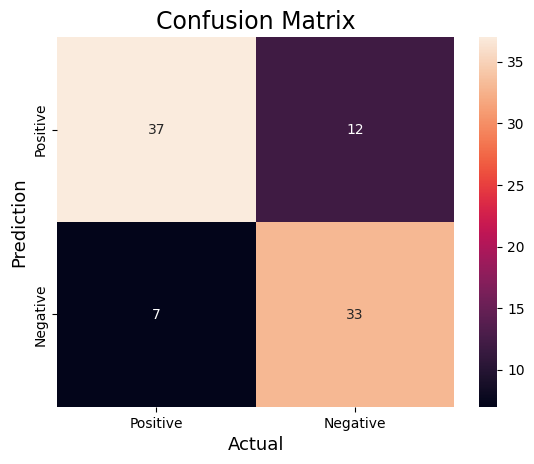

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Target_test, Target_Classification)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [35]:
33+37

70

**So after training total of 89(33+37+12+7) we got 70 observations(predictions) correct out of 89.**

**Accuracy of 0.7865 which is 78.6%**

## **This marks the end of the Heart Disease Classification Project **